In [15]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

/home/phus_stud/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/phus_stud/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/phus_stud/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/phus_stud/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/phus_stud/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size ch

In [16]:
matplotlib.rcParams['font.size'] = 11

In [17]:
dataset = datasets.load_iris()

In [19]:
ext_target = dataset.target[:, None]
ext_target.shape

df = pd.DataFrame()

(150, 1)

In [29]:
np.concatenate((dataset.data, ext_target, dataset.target_names[ext_target.flatten()][:, None]), axis = 1)
dataset.feature_names

df = pd.DataFrame(np.concatenate((dataset.data, ext_target, dataset.target_names[ext_target.flatten()][:, None]), axis = 1),
                              columns = dataset.feature_names + ['target'] + ['name target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name target
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [30]:
features = dataset.data
target = dataset.target


In [31]:
from mpl_toolkits.mplot3d import Axes3D

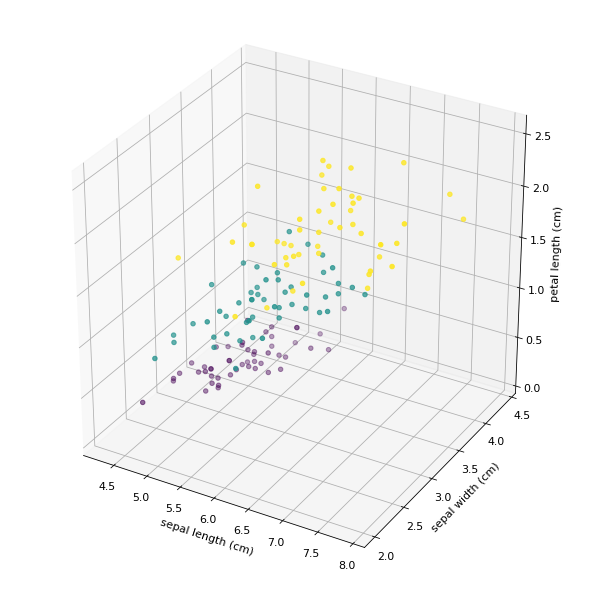

In [32]:
fig = plt.figure(figsize=(8, 8))

ax = Axes3D(fig)

ax.scatter(features[:, 0], features[:, 1], features[:, 3], c=target, marker='o')
ax.set_xlabel(dataset.feature_names[0])
ax.set_ylabel(dataset.feature_names[1])
ax.set_zlabel(dataset.feature_names[2])

plt.show()

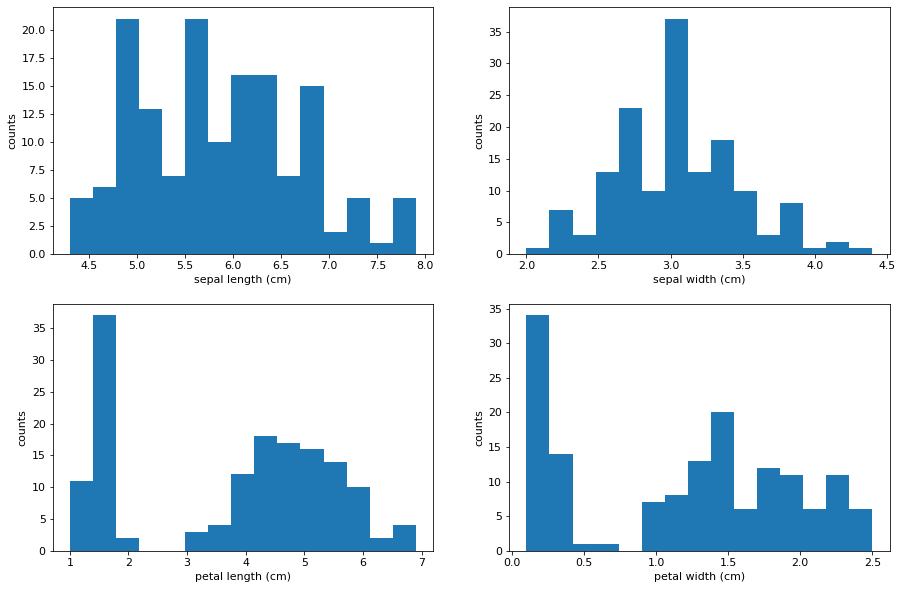

In [37]:
fig, axeses = plt.subplots(2,2, figsize = (15, 10))
for i, axes in enumerate(axeses.flatten()):
    axes.hist(features[:, i], bins = 15)
    axes.set_xlabel(dataset.feature_names[i])
    axes.set_ylabel('counts')
    
    

In [47]:
import numpy 

class Gaussian_distribution():
    
    def __init__(self, features):
        self.mean = features.mean(axis = 0)
        self.std = features.std(axis = 0)
        
    def probdensity(self, value):
        return (1/(np.sqrt(2*np.pi) * self.std)) * np.exp(-(value - self.mean)**2/(2 * self.std ** 2)) 
    
    def logprobdensity(self, value):
        return np.log(self.probdensity(value))

In [48]:
import scipy
_test = scipy.stats.norm(loc=features[:, :2].mean(axis=0), scale=features[:, :2].std(axis=0))
assert np.allclose(
    Gaussian_distribution(features[:, :2]).logprobdensity(features[:5, :2]),
    _test.logpdf(features[:5, :2])
)
print('Seems fine!')

Seems fine!


In [53]:
gaussian_distr = Gaussian_distribution(features[:, :2])
gaussian_distr.logprobdensity(features[:5, : 2])

array([[-1.13254506, -0.60435921],
       [-1.38017561, -0.09388356],
       [-1.68653276, -0.13910217],
       [-1.86173382, -0.08999759],
       [-1.24901951, -0.86542599]])

In [61]:
_test = scipy.stats.norm(loc=features[:, :2].mean(axis=0), scale=features[:, :2].std(axis=0))
_test.logpdf(features[:5, :2])

array([[-1.13254506, -0.60435921],
       [-1.38017561, -0.09388356],
       [-1.68653276, -0.13910217],
       [-1.86173382, -0.08999759],
       [-1.24901951, -0.86542599]])

In [165]:
from functools import reduce
class Naive_Bayes():
    
    def fit(self, X, y, sample_weights = None, distributions = None):
        if(distributions is None):
            list_distributions = [Gaussian_distribution] * X.shape[1]
        else:
            assert(len(distributions) == X.shape[1])
            list_distributions = distributions
            
        self.cpd = {}
        self.unique_labels = np.unique(y)
        for label in self.unique_labels:
            features_list = []
            for col in range(X.shape[1]):
                col_feature = X[y == label, col]
                features_list.append(list_distributions[col](col_feature))
            self.cpd[label] = features_list
            
        self.prior_labels = {}
        unique, counts = np.unique(y, return_counts = True)
        for idx, label in enumerate(unique):
            self.prior_labels[label] = counts[idx] / counts.sum()
            
        # self.prior_labels
        # self.cpd P(xij| y = Ck)
        #self.unique_labels 
    def predict_log_aposterior_prob(self, X):
        if(isinstance(X, list)):
            X = np.array(X, dtype = np.float)
        log_aposterior = np.zeros((X.shape[0], len(self.unique_labels)))
        for idx, label in enumerate(self.unique_labels):
            log_aposterior_label = np.log(self.prior_labels[label])
            for col in range(X.shape[1]):
                log_aposterior_label += self.cpd[label][col].logprobdensity(X[:, col])
            log_aposterior[:,idx] = log_aposterior_label
        """ 
        prior_x = np.zeros((X.shape[0], ))
        for idx, label in enumerate(self.unique_labels):
            list_probs = [self.cpd[label][col].probdensity(X[:, col]) for col in range(X.shape[1])]
            product = reduce(lambda x, y: x * y, list_probs)
            prior_x += product
        prior_x = np.log(prior_x)
    
        log_aposterior -= prior_x[:, None]
        """
        return log_aposterior
    def predict_proba(self, X):
        return np.exp(self.predict_log_aposterior_prob(X))
    
    def predict(self, X):
        if(isinstance(X, list)):
            X = np.array(X, dtype = np.float)
        return np.array([self.unique_labels[row.argmax()] for row in self.predict_log_aposterior_prob(X)])
    
    def score(self, features, targets):
        pred = self.predict(features)
        return (pred == targets).sum()/features.shape[0]
        

In [166]:
nb = Naive_Bayes()
nb.fit(features, target)
print('log probas:\n{}'.format(nb.predict_log_aposterior_prob(features[:2])))
print('predicted labels:\n{}'.format(nb.predict(features[:2])))
print('\nIt`s alive! More tests coming.')

log probas:
[[  1.06265812 -40.07797822 -56.84265482]
 [  0.42077254 -38.30788728 -56.29020688]]
predicted labels:
[0 0]

It`s alive! More tests coming.


In [167]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
Y = np.array([1, 1, 1, 2, 2, 2])
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X, Y)
clf.predict([[-0.8, -1]])
clf_my = Naive_Bayes()
clf_my.fit(X, Y)
clf_my.predict([[-0.8, -1]]), clf.predict([[-0.8, -1]])

(array([1]), array([1]))

In [168]:
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.25)

In [169]:
nb = Naive_Bayes()
nb.fit(features_train, target_train, distributions = [Gaussian_distribution]*4)
nb_log_proba = nb.predict_log_aposterior_prob(features_test)
nb.score(features_train, target_train), nb.score(features_test, target_test)

(0.9553571428571429, 0.9736842105263158)

In [170]:
nb_skl = GaussianNB()
nb_skl.fit(features_train, target_train)
nb_skl.score(features_train, target_train), nb_skl.score(features_test, target_test)

log_prob_test = nb.predict_log_aposterior_prob(features_test)
log_prob_test_skl = nb_skl.predict_log_proba(features_test)

In [171]:
assert np.allclose(log_prob_test, log_prob_test_skl), 'log probabilities do not match'
print('Seems alright!')

AssertionError: log probabilities do not match

In [140]:
log_prob_test.shape, log_prob_test_skl.shape

((38, 3), (38, 3))

In [155]:
a = np.arange(20).reshape((4, 5)) 
b = np.array(range(4))[:, None]
a.shape, b.shape
a -= b
a, b

(array([[ 0,  1,  2,  3,  4],
        [ 4,  5,  6,  7,  8],
        [ 8,  9, 10, 11, 12],
        [12, 13, 14, 15, 16]]), array([[0],
        [1],
        [2],
        [3]]))

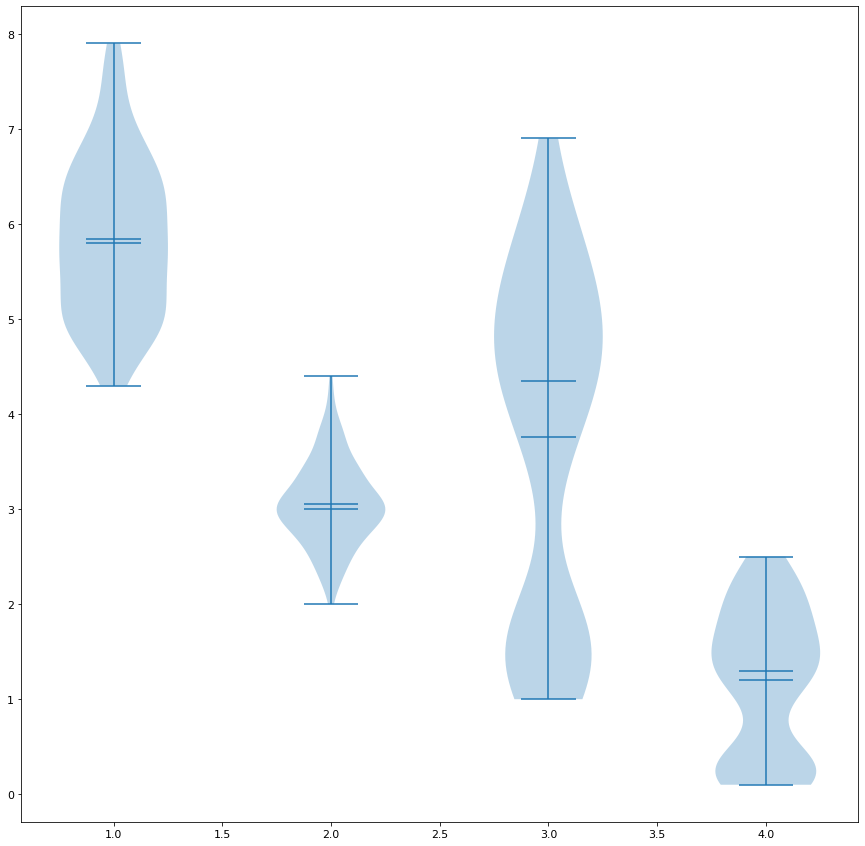

Text(0, 0.5, 'probability')

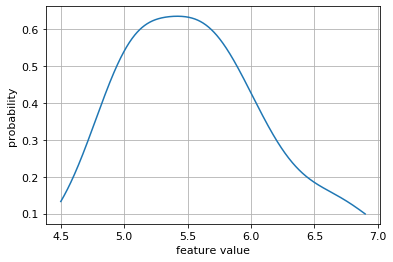

In [182]:
plt.figure(figsize=(15, 15))
plt.violinplot(features, showmedians = True, showmeans=True)
plt.show()
from sklearn.neighbors import KernelDensity
kde = KernelDensity(bandwidth = 0.28, kernel = 'gaussian')
features_col = features[target == 2, 2]
kde.fit(features_col.reshape((-1,1)))
linspace = np.linspace(features_col.min(), features_col.max(), 1000)
plt.plot(linspace, np.exp(kde.score_samples(linspace.reshape((-1, 1)))))
plt.grid()
plt.xlabel('feature value')
plt.ylabel('probability')



In [184]:
class GaussianKDE:
    def __init__(self, feature):
        self.kde = KernelDensity(bandwidth = 1., kernel = 'gaussian')
        self.kde.fit(feature.reshape((-1, 1)))
    
    def logprobdensity(self, value):
        return self.kde.score_samples(value.reshape((-1, 1)))
    
    def probdensity(self, value):
        return np.exp(self.logpdf(value))

In [185]:
nb_kde = Naive_Bayes()
nb_kde.fit(features, target, distributions = [GaussianKDE] * 4)
print('log probas:\n{}'.format(nb_kde.predict_log_aposterior_prob(features[:2])))
print('predicted labels:\n{}'.format(nb_kde.predict(features[:2])))
print('\nIt`s alive!')

log probas:
[[ -4.92598149  -9.46757733 -14.66479621]
 [ -5.00413248  -9.39765263 -14.76919016]]
predicted labels:
[0 0]

It`s alive!


In [186]:
print('KDE Naive Bayes classifier accuracy on the train set: {}'.format(nb_kde.score(features_train, target_train)))

KDE Naive Bayes classifier accuracy on the train set: 0.9285714285714286


In [187]:
print('KDE Naive Bayes classifier accuracy on the test set: {}'.format(nb_kde.score(features_test, target_test)))

KDE Naive Bayes classifier accuracy on the test set: 0.9473684210526315


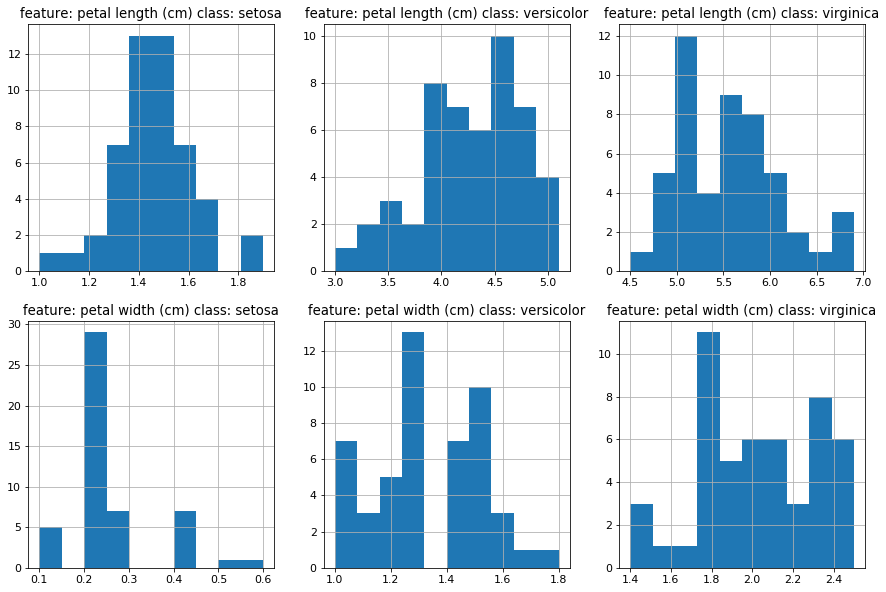

In [189]:
fig, axes = plt.subplots(2, 3, figsize = (15, 10))
for ax_idx, feature_idx in enumerate([2, 3]):
    for label in range(3):
        ax = axes[ax_idx, label]
        feature_col = features[target == label, feature_idx]
        ax.hist(feature_col, bins = 10)
        ax.grid()
        ax.set_title("feature: {} class: {}".format(
                            dataset.feature_names[feature_idx],
                            dataset.target_names[label]
        ))
        
        

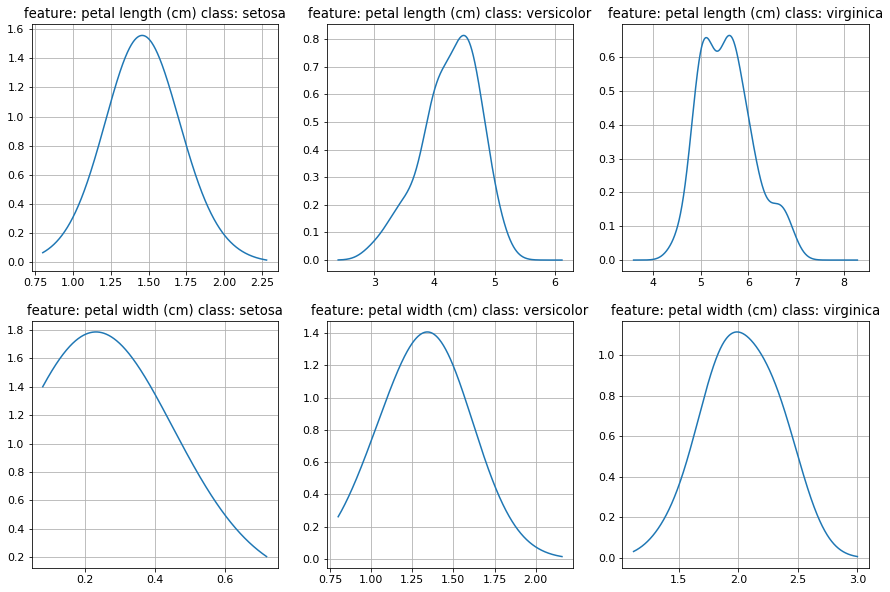

In [193]:
fig, axes = plt.subplots(2,3, figsize = (15, 10))

kde = KernelDensity(bandwidth = 0.2, kernel = 'gaussian')

for idx, feature_idx in enumerate([2, 3]):
    for label in range(3):
        ax = axes[idx, label]
        feature_col = features[target == label, feature_idx]
        kde.fit(feature_col.reshape((-1, 1)))
        linspace = np.linspace(0.8 * feature_col.min(), 
                                   1.2 * feature_col.max(), 1000)
        ax.plot(linspace, np.exp(kde.score_samples(linspace.reshape(-1, 1))))
        ax.grid()
        ax.set_title("feature: {} class: {}".format(
                            dataset.feature_names[feature_idx],
                            dataset.target_names[label]
        ))